<a href="https://colab.research.google.com/github/francomanca93/analisis-de-datos/blob/proyecto/Proyecto_Cambio_clim%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Cambio climatico

## Iniciando una rutina típica de manejo de datos

En este proyecto se verá como analizar los datasets mediante una rutina practica en donde utilizaremos las funciones aprendidas.  

Una vez obtenidos los datos hay que hacer preprocesamiento y limpieza de datos, consolidar los archivos en una base simple de analisis y extraer los insight. Para los insights utilizaremos siempre gráficas.

Utilizaremos una base de datos que habla sobre el cambio climatico, obtenida de Kaggle. Esta se llama [Global Land Temperature by Country](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv). 

### Configuramos Google Colab y librerias

En este caso configuramos google colab, pero si trabajasemos con Jupyter Notebook deberiamos configurar nuestro ambiente de trabajo.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto'
!ls

/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto
API_AG.LND.AGRI.K2_DS2_en_csv_v2_1219309.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_1221041.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1221097.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
GlobalLandTemperaturesByCountry.csv


In [4]:
import pandas as pd
import numpy as np

### Conociendo nuestro dataframe

Leemos nuestro dataset, lo guardamos en una variable para luego reconocer las labels que tiene el dataframe.

In [5]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Tenemos columnas con los nombres de los paises, temperaturas promedio, fechas. Tambien observamos que hay datos nulos NaN. Estos se deberán ir limpiando a medida que avancemos en nuestro código.

Veamos el tamaño de la base de datos

In [6]:
df_temp.shape

(577462, 4)

Veamos como esta compuesta nuestra base de datos, analizando mas informacion de la misma

In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Veamos los paises que tiene nuestra base de datos. 

In [8]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

### Mejorando nuestro dataframe

Mejoremos el formato de nuestra base de datos. En este caso creemos una variable de tipo tiempo, de nuestra columna de tiempo.

In [9]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Veamos ahora la nueva variable creada y el tipo de dato que es la misma.

In [10]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


Tenemos muchas filas, las cuales no aporten un valor significativo a nuestro análisis, en este caso. Lo que haremos es aplicarle un filtro al dataframe y obtener las fechas mayores al año 1970. 

In [11]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Vemos que teniamos unas **577.462,00** filas en el dataframe original y con este filtro lo hemos reducido a **127.332,00**. Ahora nuestro dataframe comienza en 1970, esto pasa para todos los paises.

### Agrupando datos y graficando

Agrupemos por fecha y por pais, para encontrar un promedio anual de la temperatura. Calcularemos la media y la mediana para cada fecha por pais. 

In [12]:
df_t_avg = df_temp.groupby(['Country',
                            pd.Grouper(key='year', freq='1Y') 
                            ]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Seleccionemos algun pais y grafiquemos los datos.

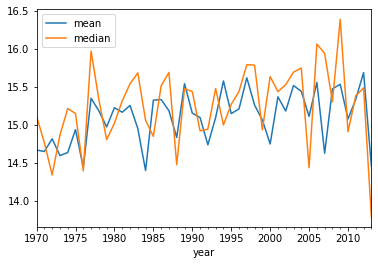

In [13]:
df_t_avg.xs('Argentina')['AverageTemperature'].plot()

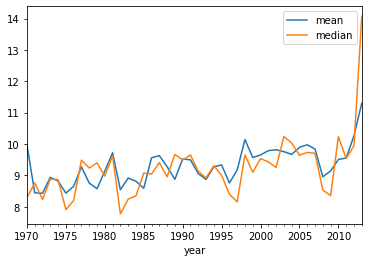

In [14]:
df_t_avg.xs('United States')['AverageTemperature'].plot()

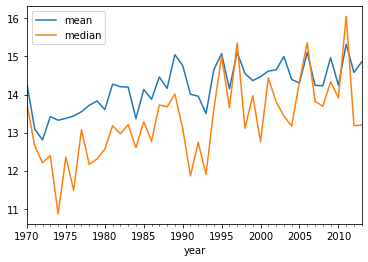

In [15]:
df_t_avg.xs('Spain')['AverageTemperature'].plot()

Vemos una clara tendencia alcista en todos los paises que estudiamos. Esto quiere decir que la temperatura siempre va en aumento.

Preferiblemente es mejor trabajar con la mediana ya que no recibe sesgos por valores atipicos o fuera de rangos. Con esto haremos un dataset de mas facil manipulacion utilizando esta variable estadistica unicamente.

In [16]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


De la fecha, no interesa extraer el año para hacer mas facil nuestro estudio anual posterior

In [17]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Renombremos algunas columnas y para no tener que reasignar al dataframe utilicemos el parametro **inplace**

In [18]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Si queremos explorar un poco la composicion de temperaturas por pais, podemos utilizar un **boxplot**, herramienta muy util para encontrar la distribucion de las variables. Pero tenemos que hacer algunas modificaciones en nuestro dataframe.

In [19]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.head(10)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

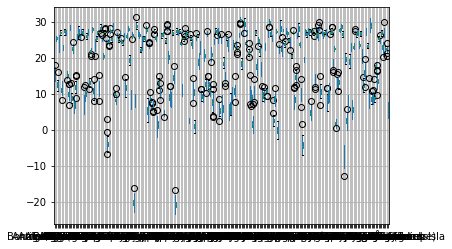

In [20]:
df_t_pivot.boxplot()

La grafica esta llena de puntos y debido a que son mucho paises, es dificil de interpretar la grafica.  Lo que podemos hacer es seleccionar una determinada cantidad de paises para poder hacer una mejor interpretacion. Seleccionemos paises aleatorios con **sample**

In [21]:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989,14.6015,25.1320,12.9095,23.740,26.7715,11.1915,22.4795,27.148,26.9740,15.4785,11.2820,28.401,8.6025,22.8395,7.4385,13.084,26.0115,26.713,25.6710,27.5585,27.0440,7.8820,10.608,25.604,26.8640,13.449,21.6025,27.6745,11.3560,23.1610,25.259,26.844,11.98,27.9425,25.466,19.8570,27.137,24.2240,-3.94,24.6915,...,22.3640,2.2945,13.482,14.0085,27.3575,28.6510,26.2005,-8.3755,19.2040,2.9025,7.5375,20.3050,22.519,4.889,22.4225,26.919,26.6215,26.7040,23.8370,26.481,20.1755,13.673,15.8665,27.236,22.920,9.8140,27.745,8.7065,8.7470,9.670,17.6955,12.6615,25.1060,24.657,26.844,22.6755,25.8545,22.4170,22.5005,5.637
1982,15.0705,25.1225,12.4050,23.031,26.8895,10.8620,22.8485,26.935,26.8135,15.5410,9.9095,28.409,8.7315,22.1050,6.0195,11.937,25.3505,27.051,25.8175,26.8630,27.0375,5.9815,9.485,25.890,26.6765,12.401,21.6555,27.7460,10.2365,23.3875,25.435,26.514,10.41,28.1800,25.338,20.3195,26.995,23.9245,-5.24,24.0320,...,22.4205,2.0085,13.235,12.9710,27.8540,28.5595,26.3435,-8.6855,19.1065,2.6855,6.6365,18.8845,23.193,5.925,22.8930,26.591,25.9385,26.7845,23.4195,26.497,19.9365,12.151,16.0500,26.873,22.963,7.6625,28.243,8.6750,8.7895,7.769,17.7920,14.0850,25.3885,24.443,26.514,21.9365,26.1680,22.7425,22.3540,6.435


Como vemos se han seleccionados aleatoriamente los años y no los paises. Lo que podemos hacer antes es una transpuesta de nuestro dataframe, seleccionar aleatoriamente los paises y luego transponer nuevamente.

In [22]:
df_t_pivot.T.sample(2)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fiji,24.986,25.4125,25.360,25.6545,25.493,25.7520,25.754,24.7600,24.912,25.2770,25.1775,25.5350,25.3725,25.377,25.547,25.4875,25.090,25.3585,25.9715,25.551,25.560,25.2935,25.1565,25.5970,25.290,25.7880,25.537,25.4365,25.9555,25.6805,25.9660,26.0770,25.6510,25.6905,25.3185,25.8065,25.9690,25.9530,25.8000,25.1120,26.0320,26.0065,25.502,26.2785
Oceania,21.832,22.0980,22.131,22.7325,21.487,21.3285,21.278,22.3905,21.879,22.3165,22.7020,22.9665,21.8775,22.023,22.136,22.0155,22.097,23.0295,23.5040,22.631,22.557,23.1000,22.2330,22.5325,22.396,21.8955,22.427,22.5305,22.8300,22.0845,21.9715,21.7295,23.3985,22.3600,23.3760,23.9325,22.6025,23.1855,22.7755,22.6485,22.6585,22.1765,22.656,21.2740


In [23]:
df_t_pivot.T.sample(2).T.head(5)

Country,North America,New Caledonia
date,,
1970,3.4110,22.3620
1971,2.4775,22.5990
1972,1.1965,23.1410
1973,2.5870,23.4685
1974,1.7425,23.1330


Sobre los datos anteriores obtengamos las graficas. Tengamos en cuenta que cada vez que corramos la linea de codigo se seleccionaran nuevamente los paises de forma aleatoria. 

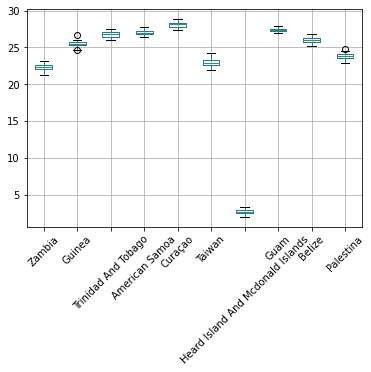

In [24]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

Lo que vimos es como a traves de un preprocesamiento y ordenamiento de las variables podiamos extraer insight de nuestra base de datos. 

Entendimos como ha variado la temperatura en los ultimos años por cada pais. Gracias a los boxplot podemos ver como la temperatura difiere dependiendo el pais en sí.

En la siguiente seccion seguiremos con el mismo set de datos y utilizaremos otros, para ver las variables que pueden impactar en el cambio climatico. Estas variables que vamos a considerar son:
* Deforestacion
* CO2
* Poblacion
* Otras.

## Preprocesamiento de datos: terminando de preparar y limpiar los datasets

Datasets relacionados con el cambio climatico. Podemos encontrar todos los datasets en el siguiente enlace, [Topic](https://data.worldbank.org/topic/climate-change).

Seleccionaremos una serie de datasets para el estudio.

* Cantidad de emision de CO2 en kilotones, [CO2 (kt)](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT).
* Cantidad de bosques deforestados en km2, [Forest (km2)](https://data.worldbank.org/indicator/AG.LND.FRST.K2).
* Cantidad de agricultura por pais en km2, [Agricultura (km2)](https://data.worldbank.org/indicator/AG.LND.AGRI.K2).
* La poblacion de cada uno de los paises, [Population (7mM)](https://data.worldbank.org/indicator/SP.POP.TOTL).
* Cantidad de energia electrica consumida en kWh per capita, [Electric power consumption (kWh per capita)](https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC).

In [25]:
%cd '/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto'
!ls

/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto
API_AG.LND.AGRI.K2_DS2_en_csv_v2_1219309.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_1221041.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1221097.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
GlobalLandTemperaturesByCountry.csv


Leemos cada uno de los datasets descargados y empezamos a trabajar a partir de la fila 2, ya que los mismos tienen ciertos datos de informacion del dataset que no aportan al estudio en si.

In [26]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_1219309.csv', header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_1221041.csv', header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1221097.csv', header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv', header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv', header=2)

Todos los dataframe tienen los mismos labels de columnas con diferentes  datos, veamos el de la poblacion como ejemplo

In [27]:
df_popu.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN


###  Dando formato a un dataset

Le daremos ahora formato a los dataframe para poder encajarlo con el dataframe de la temperatura.

Haremos una seleccion de cierta columna, utilizaremos la funcion range para obtener un rango de numeros. Con la funcion map convertiremos en string cada valor que retorna la funcion return y con esto crearemos una lista para las columnas.

In [28]:
range(1971, 2015)
map(str, range(1971, 2015))
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

Modifiquemos un dataframe para ver el como se comporta el filtro creado.

In [29]:
df_agri.loc[:, cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,380490.0,380490.0,380530.0,380540.0,380540.0,380540.0,380540.0,380540.0,380450.0,380400.0,380400.0,380400.0,380300.0,380300.0,379340.0,378130.0,377530.0,377520.0,377900.0,378670.0,377530.0,377530.0,377530.0,377530.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574040.0,574500.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,574000.0,573000.0,573000.0,573900.000000,575900.000000,575900.000000,575900.000000,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,11170.0,11180.0,11160.0,11140.0,11100.0,11130.0,11120.0,11110.0,11110.0,11170.0,11100.0,11210.0,11270.0,11270.0,11260.0,11260.0,11270.0,11310.0,11350.0,11390.0,11450.0,11440.0,11390.0,11400.000000,11210.000000,11220.000000,10770.000000,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,227.5,228.500004,228.600006,228.099995,217.999992,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,234630.0,234630.0,234650.0,234650.0,234650.0,234650.0,234700.0,234700.0,234790.0,234790.0,234810.0,236260.0,236310.0,234810.0,237250.0,237300.0,237360.0,237550.0,237200.0,236800.0,236680.0,236690.0,235950.0,236560.000000,234950.000000,235570.000000,235230.000000,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,942100.0,941600.0,941000.0,940330.0,940330.0,940330.0,940330.0,944000.0,946500.0,949000.0,953000.0,956000.0,960050.0,964730.0,969360.0,972650.0,975200.0,978900.0,979450.0,979880.0,980580.0,981250.0,980130.0,980280.000000,979280.000000,976080.000000,974830.000000,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,197800.0,198460.0,198360.0,198080.0,199610.0,199820.0,201250.0,202250.0,203660.0,205290.0,208970.0,208110.0,208260.0,210650.0,212020.0,214730.0,214580.0,218650.0,219710.0,220250.0,224050.0,224980.0,225550.0,226160.000000,229090.000000,228970.000000,227620.000000,230480.000000,229840.000000

Ahora convirtamos las variablos de años en datos para nuestro dataframe.

In [30]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


Modifiquemos los nombres de las variables de la columna para que nuestro dataframe sea similar al de la temperatura.

In [31]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable': 'date',
             'Country Name': 'Country',
             'Country Code': 'name',
             'value': 'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


###  Dando formato a todos los datasets
Lo que hicimos con el dataframe de agricultura, lo tenemos que hacer con todos los dataframes, esto lo haremos con una funcion:

In [32]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
           columns={'variable': 'date',
                    'Country Name': 'Country',
                    'Country Code': 'name',
                    'value': col})

In [33]:
df_agri = fun_format(df_agri, col= 'agriculture')
df_fore = fun_format(df_fore, col= 'forest')
df_elec = fun_format(df_elec, col= 'electric_prod')
df_co2e = fun_format(df_co2e, col= 'co2')
df_popu = fun_format(df_popu, col= 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1812771.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


Se modificaron todos los dataframe en un formato mas compacto y compatibles con el dataframe de temperaturas.

Veamos el dataframe de las temperaturas.

In [34]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Analicemos el tipo de dato de nuestros dataframe que uniremos.

In [35]:
df_t_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [36]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


Deberemos modificar la variable date a tipo float para poder hacer merge.

In [37]:
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu['date'] = df_popu['date'].astype(float)

df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


### Uniendo todos los datasets en uno

Al tener dataframe similares los podemos unir con merge

In [38]:
df_merge = pd.merge(df_t_med[['Country', 'temperature', 'date']],
                    df_popu, on = ['Country', 'date'], 
                    how = 'inner')

In [39]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [40]:
df_merge = pd.merge(df_merge,
                    df_co2e, 
                    on = ['Country', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec, 
                    on = ['Country', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri, 
                    on = ['Country', 'name', 'date'], 
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore, 
                    on = ['Country', 'name', 'date'], 
                    how = 'inner')
df_merge

,Country,temperature,date,name,population,co2,electric_prod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7803.376,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9622.208,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7873.049,608.762505,162000.0,149992.001953


Tenemos una serie de NaN, eliminaremos las filas, ya que estos datos no aportaran informacion al analisis

In [41]:
df_merge.dropna()

,Country,temperature,date,name,population,co2,electric_prod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,11210.0,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,11270.0,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,11270.0,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,11260.0,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,11260.0,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7803.376,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9622.208,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7873.049,608.762505,162000.0,149992.001953


Hasta este punto hemos realizado el trabajo que nos lleva mas tiempo, esto es:
* preparar los datasets
* unificarlos
* limpiarlos
* y otras partes del preproceso

Normalmente este trabajo para un cientifico de datos lleva a consumir entre un 60% y 70% del tiempo de trabajo. Luego de esto viene la parte mas interesante, el análisis.

## Análisis de datos

Lo que se hizo fue preparar una serie de dataframes y condensarlos en uno solo, listo para ser analizado. En esta sección veremos diversas funciones de pandas que nos permiten extraer insight de una forma muy rápida.

Definamos nuestro dataframe de cambio climatico limpio:

In [42]:
df_climate = df_merge.dropna()

Existen datos que se encuentran con notacion cientifica, esto lo podemos evitar con la siguiente linea de codigo

In [43]:
pd.set_option('display.float_format', '{:,.1f}'.format)

### Viendo diferentes variables en un gráfico

¿Cuales son los 10 paises que mas CO2 producen?

In [44]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,201,355.0
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

Con lo anterior creemos un filtro

In [45]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

Con los datos anteriores creamos un sub dataset del principal para poder graficar los paises en los cuales estamos interesados

In [50]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electric_prod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,321,666.0","5,395,532.1","13,395.1","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,556,874.0","5,270,047.4","13,247.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,830,990.0","5,082,000.0","12,966.1","4,087,065.0","3,092,700.0"


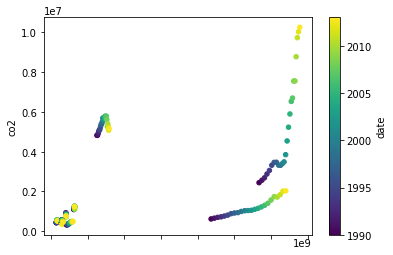

In [52]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

Cada una de las lineas que se puede observar en el **boxplot** representa un **pais**. En el **eje x** tenemos a la **poblacion** y en el **eje y** tenemos a la **emisión de co2**. La variación de colores me esta representando los años y como estos van en aumento a medida que se hace mas amarillo. 

**Conclusion**: A medida que se ha aumentado la poblacion año tras año a ido aumentando la emisión de co2. Se puede ver una clara correlación cuando aumentan todas las variables.

### Heatmap plot - Correlacion entre variables

¿Que pasa si correlacionamos estas variables entre ellas mismas, o sea todos los paises? Con las función **.corr()** podemos obtener numericamente la correlacion entre las variables.

In [53]:
df_climate.corr()

,temperature,date,population,co2,electric_prod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electric_prod,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


A simple vista cuesta un poco leer todos los numeros, por lo tanto lo que haremos será graficar todas estas correlaciones en un **heatmap o mapa de color**.

In [54]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


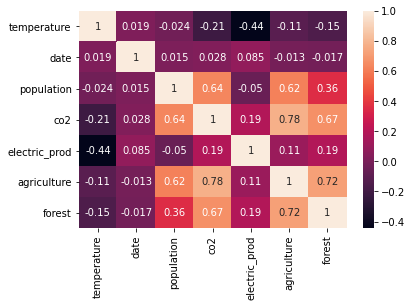

In [56]:
sns.heatmap(df_climate.corr(), annot=True)

Los colores mas claritos indican una correlacion mas alta. 
Con esto podemos ver una clara correlación, mayor al 60% entre:
* la poblacion y el co2
* la poblacion y la agricultura
* el co2 y la agricultura
* el co2 y la deforestancion

Algunas otras correlaciones pueden ser baja, ya que, por ejemplo la temperatura varia mucho de pais en pais y esto puede modificar su correlacion total con otras variables. Entonces encontrar una correlacion entre la temperatura y la variacion de co2, por ejemplo, entre tanta variedad de paises, puede ser dificil. A parte estamos correlacionando a nivel paises.

¿Que pasaría si eliminarammos los paises y correlacionaramos todo a nivel mundial, como un todo?

Agrupemos todo a nivel de años, obtengamos una mediana de todos los paises como un solo planeta:

In [58]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electric_prod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","26,714.1","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,106,061.0","25,333.5","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,877,647.0","27,165.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","26,681.1","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,535.1","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,481.2","1,807.3","80,550.0","40,834.0"


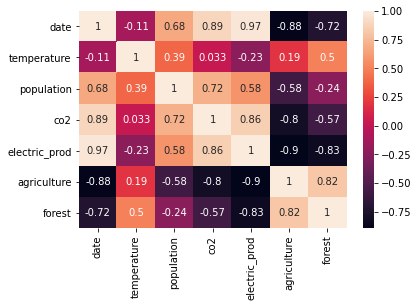

In [59]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

Con esto podemos encontrar ahora claras correlaciones entre otras variables, analicemoslas:

Para tener en cuenta los niveles de correlacion van como sigue:

![correlacion](https://statssos.files.wordpress.com/2015/03/correlacionesmagnitud.jpg)

Hay una **muy alta** correlacion, entre 80 y 100%:
* La fecha (aumento de años) y la produccion electrica.
* La fecha y la produccion de co2.
* La produccion electrica y de co2.
* La agricultura y la deforestacion.

Hay una **alta** correlacion, entre 60 y 80%:
* La fecha y la poblacion.

Hay una **moderada** correlacion, entre 50 y el 60%:
* La poblacion y la produccion electrica.
* La temperatura y la deforestacion.

El análisis anterior lo podemos ver en una gráfica, esto nos permite ver como esta correlacionadas diversas variables de un mismo dataframe. 

### Scatter plot con forma de matriz - Observando correlacion con puntos
Ahora haremos un grafico de puntos con forma de matriz, con esto podremos ver la relacion en los puntos de la matriz de colores anterior:

In [61]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f391394d240>,
      dtype=object)

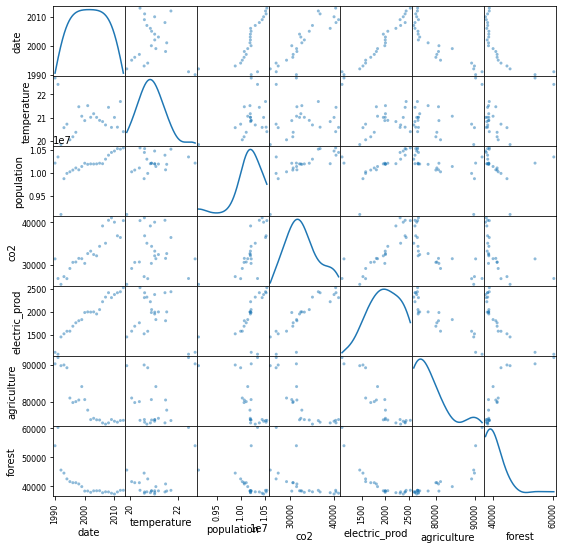

In [64]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(9,9))

Seaborn es una libreria de graficado especializada para tal fin. Haremos el mismo gráfico anterior y veremos como visualmente es mas agradable.

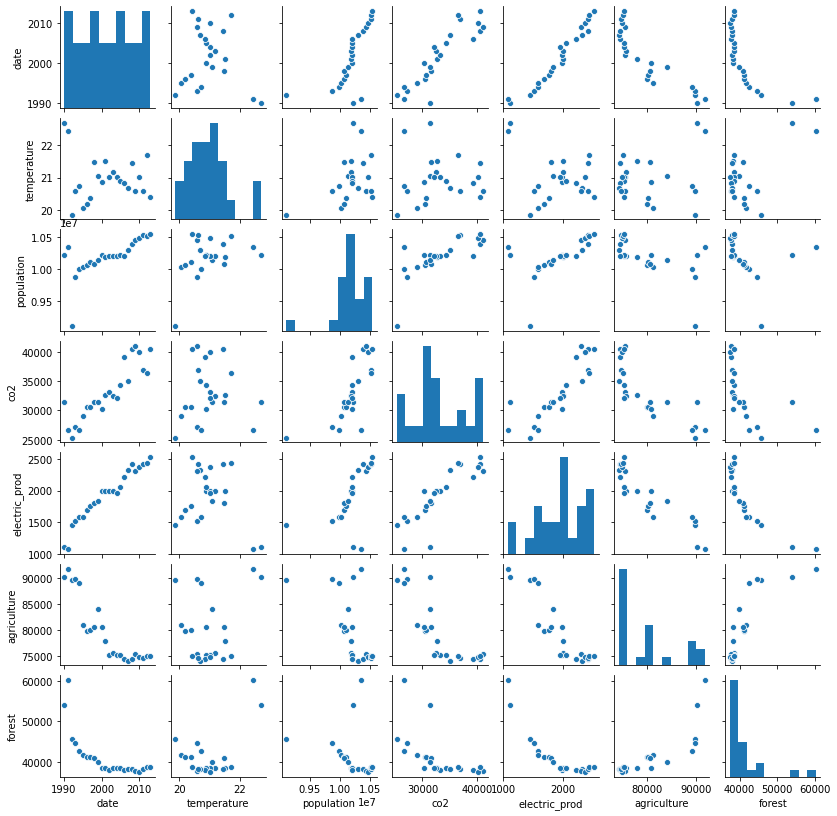

In [69]:
sns.pairplot(df_med.reset_index(), height=1.6)

Aca se realiza un scatter plot entre todas las variables y ella misma.

Cuando la variable se grafica con ella misma lo que se grafica es una distribucion de probabilidades no parametricas.

### Grafico de coordenadas paralelas.

Con este gráfico podremos comparar diferentes variables entre diferentes paises para este caso.

In [70]:
from pandas.plotting import parallel_coordinates

In [71]:
df_samerica = df_climate[
  df_climate['Country'].isin(['Colombia', 
                              'Argentina',
                              'Bolivia',
                              'Mexico',
                              'Peru',
                              'Chile'])
][['Country',
     'temperature',
     'co2',
     'agriculture',
     'forest']]

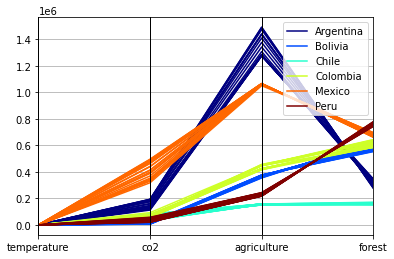

In [73]:
parallel_coordinates(df_samerica, 'Country', colormap='jet')

Se aprendio en el proyecto a como aplicar diversas herramientas de Pandas para el analisis de datos. Desde el preprocesamiento y unificaciones de bases de datos, hasta el analisis.